## MÔ TẢ TẬP DỮ LIỆU
---
Tập dữ liệu bao gồm 545 bản ghi về các thông số của căn nhà và giá bán. Các thông số bao gồm:
1. area: diện tích căn nhà
2. bedrooms: số phòng ngủ (interger)
3. bathrooms: số phòng tắm
4. mainroad: Có gần đường chính hay không (Yes|No)
5. gestroom: Có phòng khách hay không (Yes | No)
6. basement: Có tầng hầm hay không (Yes | No)
7. parking: số chỗ đỗ xe oto
8. furnishingstatus: Tình trạng nội thất của căn nhà
    * furnished: đầy đủ nội thất 
    * unfurnished: không có nội thất
    * semi-furnished: được trang bị một phần nội thất
9. price: Giá bán ($)

## A. Chuẩn bị dữ liệu
---
### A.1 Đọc và quan sát dữ liệu

In [1]:
#Gọi thư viện sử dụng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#----------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load dữ liệu từ datasets:
data = pd.read_csv('Data/Data_Housing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   mainroad          545 non-null    object
 4   guestroom         545 non-null    object
 5   basement          545 non-null    object
 6   parking           545 non-null    int64 
 7   furnishingstatus  545 non-null    object
 8   price             545 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 38.4+ KB


In [3]:
#Hiển thị 5 dòng dữ liệu đầu tiên:
data.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,furnishingstatus,price
0,7420,4,2,yes,no,no,2,furnished,13300000
1,8960,4,4,yes,no,no,3,furnished,12250000
2,9960,3,2,yes,no,yes,2,semi-furnished,12250000
3,7500,4,2,yes,no,yes,3,furnished,12215000
4,7420,4,1,yes,yes,yes,2,furnished,11410000


In [4]:
#Hiển thị 5 dòng dữ liệu cuối cùng:
data.tail()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,furnishingstatus,price
540,3000,2,1,yes,no,yes,2,unfurnished,1820000
541,2400,3,1,no,no,no,0,semi-furnished,1767150
542,3620,2,1,yes,no,no,0,unfurnished,1750000
543,2910,3,1,no,no,no,0,furnished,1750000
544,3850,3,1,yes,no,no,0,unfurnished,1750000


In [5]:
#Kiểm tra dữ liệu missing:
data.isnull().sum()

area                0
bedrooms            0
bathrooms           0
mainroad            0
guestroom           0
basement            0
parking             0
furnishingstatus    0
price               0
dtype: int64

In [6]:
#Kiểm tra dữ liệu trùng lặp:
data.duplicated().sum()

0

In [7]:
#Các đặc trưng thống kê của các thuộc tính số:
data.describe()

,area,bedrooms,bathrooms,parking,price
count,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,3.000000,1.330000e+07


**NHẬN XÉT:**
* Diện tích các căn nhà trong khoảng từ 1650 (m2) đến 16200 (m2), trung bình là 5150 (m2)
* Số phòng của của các căn nhà nhỏ nhất là 1 phòng, nhiều nhất là 6 phòng ngủ, trung bình ~3 phòng ngủ mỗi căn nhà
* Số phòng tắm nhỏ nhất là 1 phòng, nhiều nhất là 4 phòng.
* Chỗ đỗ xe, thấp nhất là 0 có chỗ đỗ nào, nhiều nhất là 3 bãi đỗ xe.
* Giá bán trong khoảng từ 1.75 triệu USD đến 13.3 triệu USD, trung bình mỗi căn bán với giá 4.77 triệu USD

In [8]:
#Quan sát các đặc trưng thống kê của biến có kiểu Object:
data.describe(include='O')

,mainroad,guestroom,basement,furnishingstatus
count,545,545,545,545
unique,2,2,2,3
top,yes,no,no,semi-furnished
freq,468,448,354,227


In [9]:
#Thống kê tình trạng nội thất của các căn nhà:
data['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

**NHẬN XÉT:**
* Các căn nhà chủ yếu là gần đường chính với 468/545 (~ 86%) căn - Yes
* Các căn nhà hầu hết là không có phòng khách với 448/545 (~82%) căn - No
* Đại đa số các căn nhà không có tầm hầm 354/545 (65%) căn - No
* Các căn nhà đã được trang bị đầy đủ nội thất (140/545 ~ 26%), trang bị một phần (227/545 ~ 42%), không có nội thất (178/545 ~ 33%)

### A.2. Chuẩn hóa dữ liệu
---
Biến đổi dữ liệu các thuộc tính Object về dạng số:
Có 4 thuộc tính có kiểu dữ liệu là Object:
1. mainroad: yes - no
2. guestroom: yes - no
3. basement: yes - no
4. furnishingstatus: furnished  - semi-furnished - unfurnished

In [10]:
#Tạo bản sao dữ liệu:
data_ml = data.copy()
data_ml

,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,furnishingstatus,price
0,7420,4,2,yes,no,no,2,furnished,13300000
1,8960,4,4,yes,no,no,3,furnished,12250000
2,9960,3,2,yes,no,yes,2,semi-furnished,12250000
3,7500,4,2,yes,no,yes,3,furnished,12215000
4,7420,4,1,yes,yes,yes,2,furnished,11410000
...,...,...,...,...,...,...,...,...,...
540,3000,2,1,yes,no,yes,2,unfurnished,1820000
541,2400,3,1,no,no,no,0,semi-furnished,1767150
542,3620,2,1,yes,no,no,0,unfurnished,1750000
543,2910,3,1,no,no,no,0,furnished,1750000


In [11]:
#Thực hiện LabelEncoder các thuộc tính Object:
data_ml['mainroad']=data_ml['mainroad'].map({'no':0,
                                             'yes':1}).astype(int)

data_ml['guestroom']=data_ml['guestroom'].map({'no':0,
                                               'yes':1}).astype(int)

data_ml['basement']=data_ml['basement'].map({'no':0,
                                             'yes':1}).astype(int)

data_ml['furnishingstatus']=data_ml['furnishingstatus'].map({'furnished':0,
                                                             'semi-furnished':1,
                                                             'unfurnished':2}).astype(int)
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   area              545 non-null    int64
 1   bedrooms          545 non-null    int64
 2   bathrooms         545 non-null    int64
 3   mainroad          545 non-null    int32
 4   guestroom         545 non-null    int32
 5   basement          545 non-null    int32
 6   parking           545 non-null    int64
 7   furnishingstatus  545 non-null    int32
 8   price             545 non-null    int64
dtypes: int32(4), int64(5)
memory usage: 29.9 KB


In [12]:
#Dữ liệu mới:
data_ml

,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,furnishingstatus,price
0,7420,4,2,1,0,0,2,0,13300000
1,8960,4,4,1,0,0,3,0,12250000
2,9960,3,2,1,0,1,2,1,12250000
3,7500,4,2,1,0,1,3,0,12215000
4,7420,4,1,1,1,1,2,0,11410000
...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,0,1,2,2,1820000
541,2400,3,1,0,0,0,0,1,1767150
542,3620,2,1,1,0,0,0,2,1750000
543,2910,3,1,0,0,0,0,0,1750000


In [13]:
#Lưu dữ liệu đã xử lý:
data_ml.to_csv('Data/Data_housing_ok.csv',index=None)

## B. Dự đoán giá nhà với mô hình hồi quy tuyến tính
---
1. Simple Linear Regression
2. Multiple Linear Regression

## 1. Hồi quy tuyến tính đơn giản ( 1 biến độc lập)



**Sử dụng 1 tham số diện tích (area) để dự đoán giá nhà (price):**

xây dựng phương trình: $$y_{price} = w_0 + w_1 * x_{area}$$

### 1.1) Đọc tập dữ liệu đã xử lý
---

In [14]:
#Gọi các thư viện sử dụng:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#----------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [15]:
#Đọc dữ liệu đã xử lý:
df_house = pd.read_csv('Data/Data_housing_ok.csv')
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   area              545 non-null    int64
 1   bedrooms          545 non-null    int64
 2   bathrooms         545 non-null    int64
 3   mainroad          545 non-null    int64
 4   guestroom         545 non-null    int64
 5   basement          545 non-null    int64
 6   parking           545 non-null    int64
 7   furnishingstatus  545 non-null    int64
 8   price             545 non-null    int64
dtypes: int64(9)
memory usage: 38.4 KB


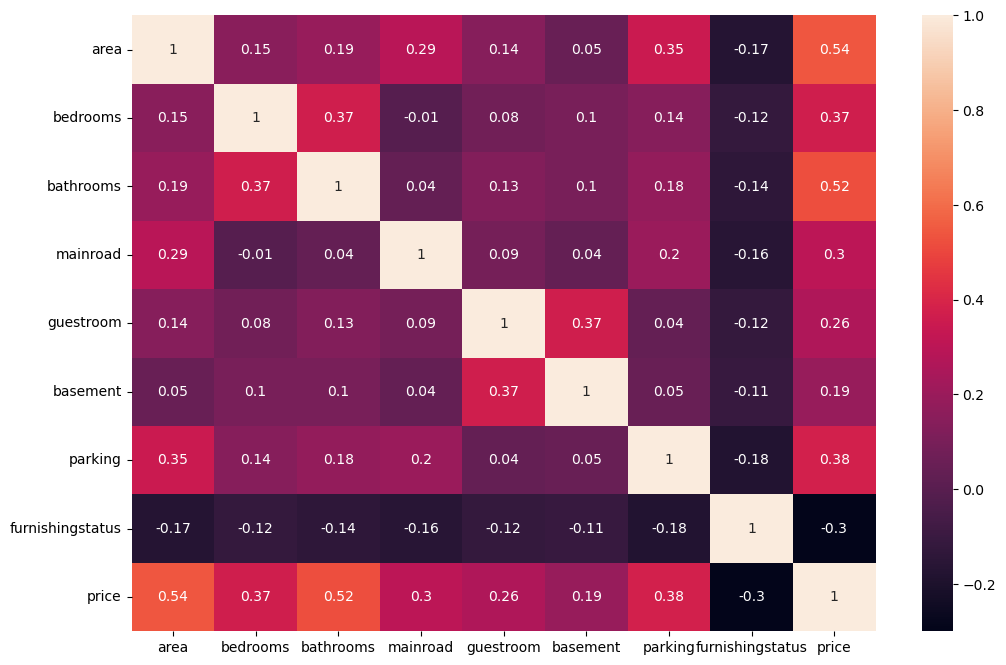

In [16]:
#Xác định mức độ ảnh hưởng của các thuộc tính tới giá bán một căn nhà:
#Xác định hệ số tương quan trong tập dữ liệu
import seaborn as sns
correlation_matrix = df_house.corr().round(2) # hàm tự động tính tương quan giữa các tham số
# annot = True to print the values inside the square
plt.figure(figsize=(12,8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


**Mức độ ảnh hưởng của 8 thuộc tính tới giá của một căn nhà là khác nhau:**
1. area: Diện tích tương quan thuận đến giá bán (0.54)
2. bedrooms: Tương quan thuận với giá bán (0.37)
3. bathrooms: Tương quan thuận với giá bán (0.52)
4. mainroad: Tương quan thuận, các căn nhà gần đường chính giá cao hơn (0.3)
5. gestroom: Tương quan thuận (0.26)
6. Basement: Tương quan thuận (0.19)
7. parking: Tương quan thuận (0.38)
8. furnishingstatus: Tương quan nghịch, các căn nhà ko có nội thất giá càng thấp (-0.3)


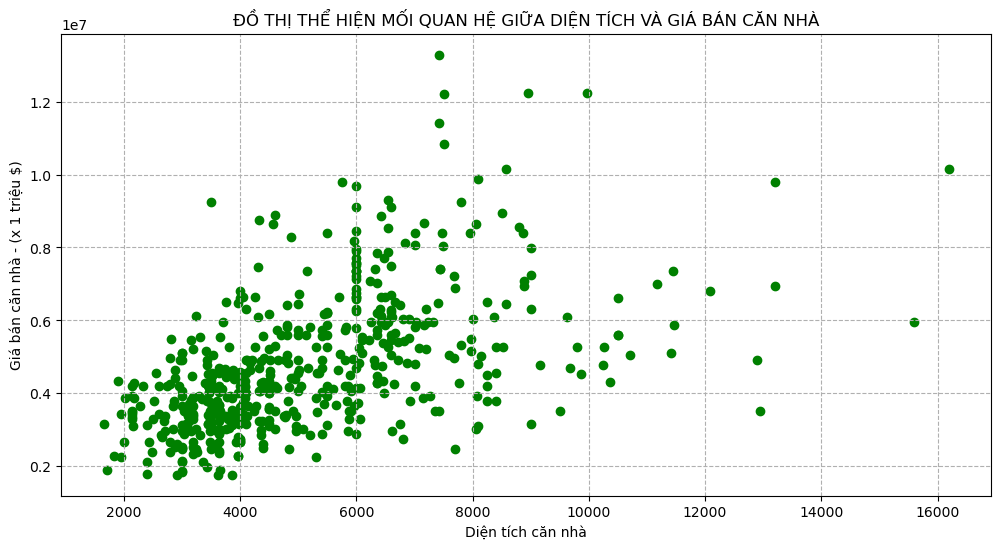

In [17]:
#Trực quan hóa dữ liệu diện tích với giá bán nhà (price):
plt.figure(figsize=(12,6))
plt.scatter(df_house['area'],
            df_house['price'],
            marker='o', 
            color='green')
plt.title('ĐỒ THỊ THỂ HIỆN MỐI QUAN HỆ GIỮA DIỆN TÍCH VÀ GIÁ BÁN CĂN NHÀ')
plt.xlabel('Diện tích căn nhà')
plt.ylabel('Giá bán căn nhà - (x 1 triệu $)')
plt.grid(ls='--')
plt.show()

In [18]:
#XÂY DỰNG MÔ HÌNH HỒI QUY TUYẾN TÍNH DIỆN TÍCH ĐỂ DỰ BÁO GIÁ NHÀ
#Tách Dữ liệu lấy tham số diện tích và giá nhà
df_house[['area','price']].head(10)

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000
5,7500,10850000
6,8580,10150000
7,16200,10150000
8,8100,9870000
9,5750,9800000


### 1.2 phân tách biến độc lập và biến phụ thuộc
---

In [19]:
#Tách các biến độc lập để xây dựng mô hình hồi quy
X_area = df_house['area'].values

#Tách biến phụ thuộc:
y_price = df_house['price'].values

#------------Biến đổi X về dạng ma trận-------
X_area = X_area.reshape(-1,1)


#Hiển thị 10 bộ tham số đầu tiên:
print('Diện tích:', X_area[:5,0])
print('Giá bán  :', y_price[:5])

Diện tích: [7420 8960 9960 7500 7420]
Giá bán  : [13300000 12250000 12250000 12215000 11410000]


### 1.3 Phân tách tập dữ liệu thành tập Train - Test
---

Phân tách làm 2 phần dùng để huấn luyện và kiểm thử mô hình theo tỷ lệ (80% - 20%)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_area, 
                                                    y_price, 
                                                    test_size=0.2,
                                                    shuffle=True)

print("1. Kích thước tập Training:", len(y_train))
print("2. Kích thước tập Test    :" ,len(y_test))

1. Kích thước tập Training: 436
2. Kích thước tập Test    : 109


In [21]:
X_train[:10]

array([[7700],
       [3850],
       [4095],
       [6750],
       [7680],
       [4500],
       [6615],
       [5948],
       [4040],
       [3850]], dtype=int64)

In [22]:
y_train[:10]

array([2450000, 3430000, 4900000, 3150000, 7210000, 4270000, 2940000,
       4935000, 4480000, 3850000], dtype=int64)

### 1.4. Khai báo sử dụng mô hình hồi quy tuyến tính với tham số mặc định
---

In [23]:
#Sử dụng model hồi quy tuyến tính cho bài toán 
from sklearn.linear_model import LinearRegression

#khai báo sử dụng model với các tham số mặc định
model_linear = LinearRegression()

#Các tham số của mô hình:
model_linear.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### 1.5 Huấn luyện mô hình
---

In [24]:
#Huấn luyện model:
model_linear.fit(X_train, y_train)

LinearRegression()

In [25]:
#Lấy các hệ số của phương trình:
#hệ số w1:
w1 = model_linear.coef_
print('Hệ số: w1= ', w1)

Hệ số: w1=  [423.44984514]


In [26]:
#Hệ số w0 (bias):
w0 = model_linear.intercept_
print('Hệ số: w0= ', w0)

Hệ số: w0=  2509641.495511354


### Phương trình đường thẳng xác định được:
$$\overline{y} = f(x) = w0 + w1*x_{area} = 2315946.29 + 475.1*x_{area}$$

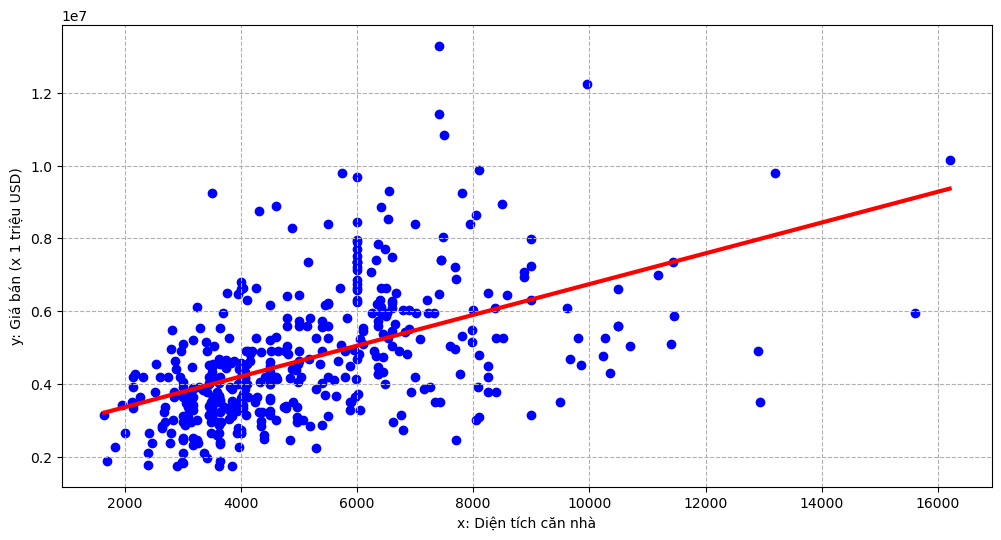

In [27]:
#Trực quan hóa đường hồi quy tuyến tính
import numpy as np
xx=np.linspace(min(X_train),max(X_train)).reshape(-1,1)

plt.figure(figsize=(12,6))
plt.scatter(X_train,y_train,color="blue")
plt.plot(xx,model_linear.predict(xx),color="red",linewidth=3)
plt.ylabel("y: Giá bán (x 1 triệu USD)")
plt.xlabel("x: Diện tích căn nhà")
plt.grid(ls='--')
plt.show()

### 1.6 Dự đoán với mô hình hồi quy tuyến tính xác định được
---

In [28]:
#Giả sử có một căn nhà mới có diện tích 14000 m2
x_area = 14000
print('Diện tích căn nhà: ', x_area)

Diện tích căn nhà:  14000


In [29]:
#---Theo phương trình đường thẳng:
y_price = w0 +w1*x_area
print('--> Giá bán căn nhà tương ứng là: ', np.round(y_price,0),)

--> Giá bán căn nhà tương ứng là:  [8437939.]


In [30]:
#---Theo mô hình hồi quy:
y_price = model_linear.predict(np.array([x_area]).reshape(-1,1))
print('--> Giá bán căn nhà tương ứng là: ', np.round(y_price,0))

--> Giá bán căn nhà tương ứng là:  [8437939.]


### 1.7 Đánh giá độ chính xác của mô hình trên tập test
---

In [31]:
#Dự đoán giá bán trên tập Test:
y_pred =model_linear.predict(X_test)

#Làm tròn và chuyển về số nguyên
y_pred = np.round(y_pred,0).astype(int)

print('Kết quả trên tập Test:',y_pred.ravel())

Kết quả trên tập Test: [4355883 4457511 4986823 5279003 5050341 4440573 4330476 3779991 3858329
 5539425 4499856 4046764 4986823 4161096 5541542 3614846 5310762 4050999
 3949371 6142841 3843509 3316313 4190737 4838616 4796271 4762395 6066620
 3431068 3843509 4415166 5033403 3907026 4097578 6390983 5283238 3779991
 4110282 5674929 3795235 4027286 4377055 5050341 4838616 3830805 6267759
 3424293 3729177 5473790 3417941 4067937 5304410 3568266 4372821 4220379
 3818102 5050341 4584546 5050341 4978354 3858329 3689796 4372821 4197513
 5075748 4542201 4474449 3525074 5304410 3741881 3991716 3957840 5139265
 5960758 3779991 5558480 4203441 5007996 4101813 5304410 5050341 6236000
 3335369 4220379 5367928 4254255 6303752 4338945 7629150 4330476 5202783
 4762395 4550670 5325583 5050341 4965651 5350990 3983247 4838616 4050999
 5406038 4415166 4635360 4097578 3362893 5473790 4338945 8099179 5685515
 5473790]


In [32]:
#So sánh giá bán và giá dự đoán 10 căn nhà đầu tiên trong tập test
print('Giá dự đoán :',y_pred[:5].ravel())
print('Giá bán thật:',y_test[:5].ravel())

Giá dự đoán : [4355883 4457511 4986823 5279003 5050341]
Giá bán thật: [4270000 3500000 4200000 5950000 6629000]


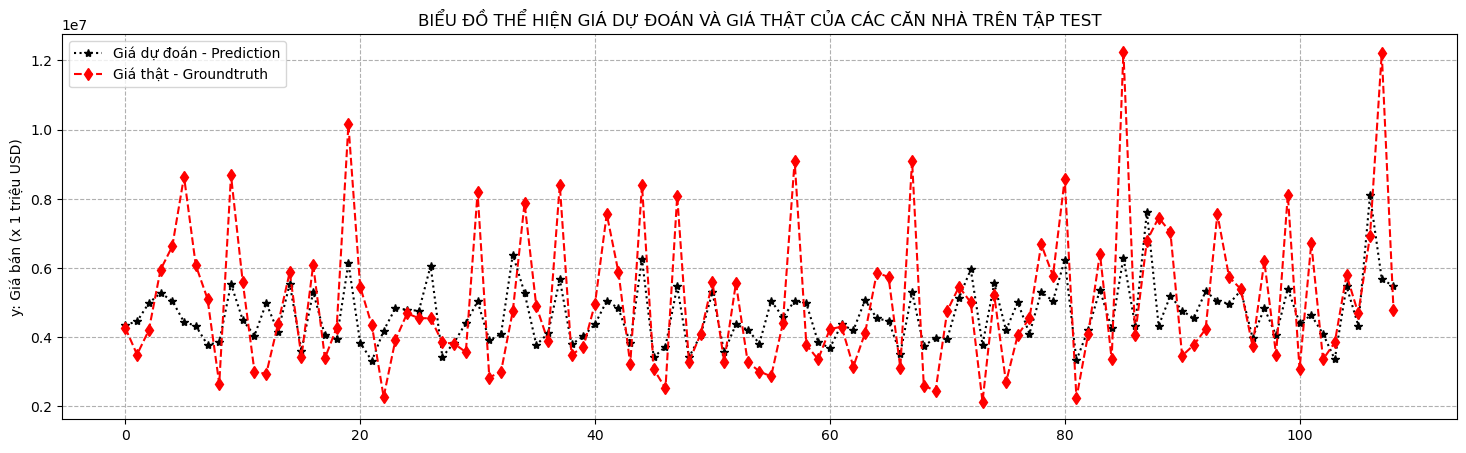

In [33]:
#Trực quan hóa kết quả giá thật và giá dự đoán
plt.figure(figsize=(18,5))
plt.plot(y_pred, marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test, marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.title('BIỂU ĐỒ THỂ HIỆN GIÁ DỰ ĐOÁN VÀ GIÁ THẬT CỦA CÁC CĂN NHÀ TRÊN TẬP TEST')
plt.ylabel("y: Giá bán (x 1 triệu USD)")
plt.grid(ls='--')
plt.legend()
plt.show()

### Đánh giá độ chính xác của mô hình hồi quy
---


**A.Model sử dụng các tham số mặc định:**

In [34]:
# Đánh giá độ chính xác trên tập TEST:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Tính các sai số của mô hình:
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = (np.sqrt(mse_test))


print("Độ chính xác của mô hình trên tập Kiểm thử:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',round(mae_test,0))
print('2.Sai số MSE  = ',round(mse_test,0))
print('3.Sai số RMSE = ',round(rmse_test,0))


Độ chính xác của mô hình trên tập Kiểm thử:
--------------------------------------------
1.Sai số MAE  =  1245569.0
2.Sai số MSE  =  2888105534449.0
3.Sai số RMSE =  1699443.0


In [35]:
#Xác định mẫu dự đoán chênh lệch giữa giá thực và giá predict lớn nhất:
from sklearn.metrics import max_error
max_error(y_test, y_pred)

6529485

### B.Thay đổi tham số của mô hình hồi quy:
---


In [36]:
#khai báo sử dụng model với các tham số thay đổi:
model_linear1 = LinearRegression(fit_intercept=False,
                                 copy_X=False)

#Các tham số của mô hình mới:
model_linear1.get_params()

{'copy_X': False, 'fit_intercept': False, 'n_jobs': None, 'positive': False}

In [37]:
#Huấn luyện model:
model_linear1.fit(X_train,y_train)

LinearRegression(copy_X=False, fit_intercept=False)

In [38]:
#Lấy các hệ số của phương trình:
#hệ số w1:
w11 = model_linear1.coef_
w11

array([834.50208962])

In [39]:
#Hệ số w0 (bias):
w01 = model_linear1.intercept_
w01

0.0

### Phương trình đường thẳng xác định được:
$$\overline{y} = f(x) = w0 + w1*x_{area} = 0 + 844.29*x_{area}$$

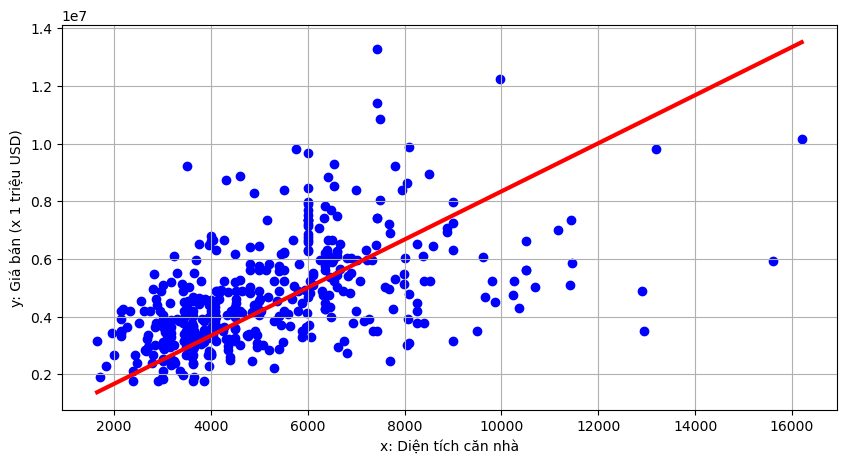

In [40]:
#Trực quan hóa đường hồi quy tuyến tính
import numpy as np
xx=np.linspace(min(X_train),max(X_train)).reshape(-1,1)

plt.figure(figsize=(10,5))
plt.scatter(X_train,y_train,color="blue")
plt.plot(xx,model_linear1.predict(xx),color="red",linewidth=3)
plt.ylabel("y: Giá bán (x 1 triệu USD)")
plt.xlabel("x: Diện tích căn nhà")
plt.grid()
plt.show()

### Dự đoán giá bán trên tập test:
---

In [41]:
#Kiểm tra trên tập Test:
y_pred1 =model_linear1.predict(X_test)

#Làm tròn và chuyển về số nguyên
y_pred1 = np.round(y_pred1,0).astype(int)

print('Kết quả trên tập Test:',y_pred1.ravel())

Kết quả trên tập Test: [ 3638429  3838710  4881837  5457644  5007013  3805330  3588359  2503506
  2657889  5970862  3922160  3029243  4881837  3254558  5975035  2178050
  5520231  3037588  2837307  7160028  2628682  1589726  3312973  4589761
  4506311  4439551  7009818  1815877  2628682  3755259  4973632  2753857
  3129383  7649046  5465989  2503506  3154418  6237903  2533548  2990855
  3680154  5007013  4589761  2603647  7406206  1802525  2403366  5841515
  1790007  3070968  5507714  2086255  3671809  3371388  2578611  5007013
  4089060  5007013  4865147  2657889  2325757  3671809  3326325  5057083
  4005610  3872090  2001136  5507714  2428401  2920757  2853997  5182258
  6801192  2503506  6008415  3338008  4923562  3137728  5507714  5007013
  7343618  1627279  3371388  5632889  3438149  7477139  3605049 10089130
  3588359  5307433  4439551  4022300  5549439  5007013  4840112  5599509
  2904067  4589761  3037588  5707994  3755259  4189200  3129383  1681522
  5841515  3605049 11015428 

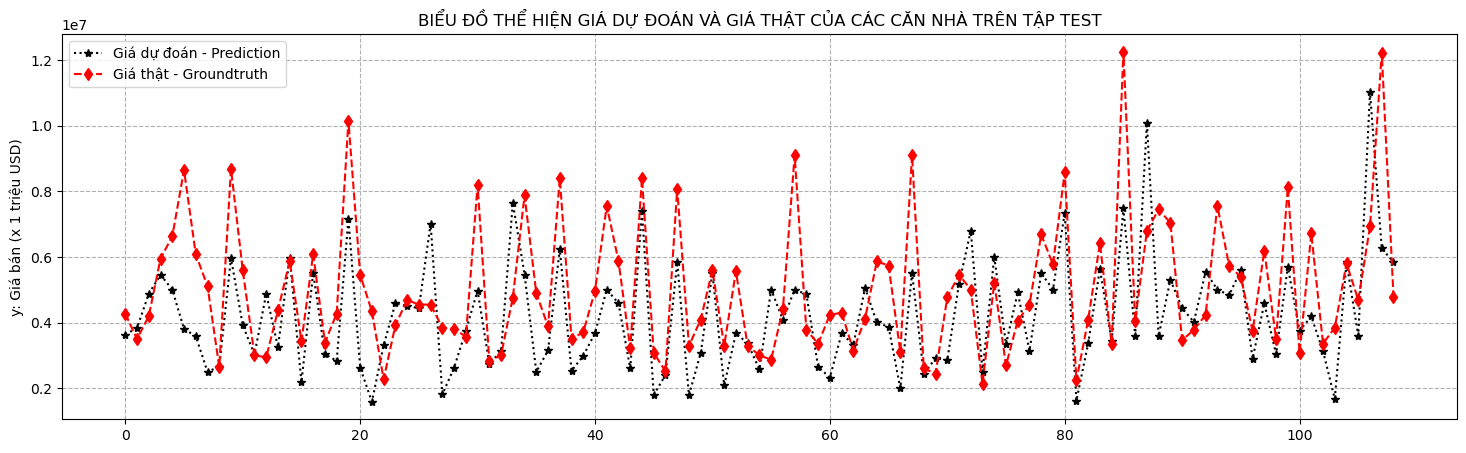

In [42]:
#Trực quan hóa kết quả
plt.figure(figsize=(18,5))
plt.plot(y_pred1, marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test, marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.title('BIỂU ĐỒ THỂ HIỆN GIÁ DỰ ĐOÁN VÀ GIÁ THẬT CỦA CÁC CĂN NHÀ TRÊN TẬP TEST')
plt.ylabel("y: Giá bán (x 1 triệu USD)")
plt.grid(ls='--')
plt.legend()
plt.show()

### Đánh giá độ chính xác trên Model thay đổi tham số:
---

In [43]:
# Đánh giá độ chính xác trên tập TEST:
#Tính các sai số:
mae_test1 = mean_absolute_error(y_test, y_pred1)
mse_test1 = mean_squared_error(y_test, y_pred1)
rmse_test1 = (np.sqrt(mse_test1))

print("Độ chính xác của mô hình thay đổi trên tập Kiểm thử:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',round(mae_test1,0))
print('2.Sai số MSE  = ',round(mse_test1,0))
print('3.Sai số RMSE = ',round(rmse_test1,0))

Độ chính xác của mô hình thay đổi trên tập Kiểm thử:
--------------------------------------------
1.Sai số MAE  =  1390751.0
2.Sai số MSE  =  3331998715636.0
3.Sai số RMSE =  1825376.0


In [44]:
#Xác định mẫu dự đoán chênh lệch giữa giá thực và giá predict lớn nhất:
max_error(y_test, y_pred1)

5956234

In [45]:
#Giả sử có một căn nhà mới có diện tích 14000 m2
x_area = 14000
print('Diện tích căn nhà: ', x_area)

#Sử dụng model dự báo giá bán:
y_price1 = model_linear1.predict(np.array([x_area]).reshape(-1,1))
print('--> Giá bán căn nhà tương ứng là: ', np.round(y_price1,0))

Diện tích căn nhà:  14000
--> Giá bán căn nhà tương ứng là:  [11683029.]


## 2) Hồi quy tuyến tính nhiều chiều (nhiều biến độc lập)

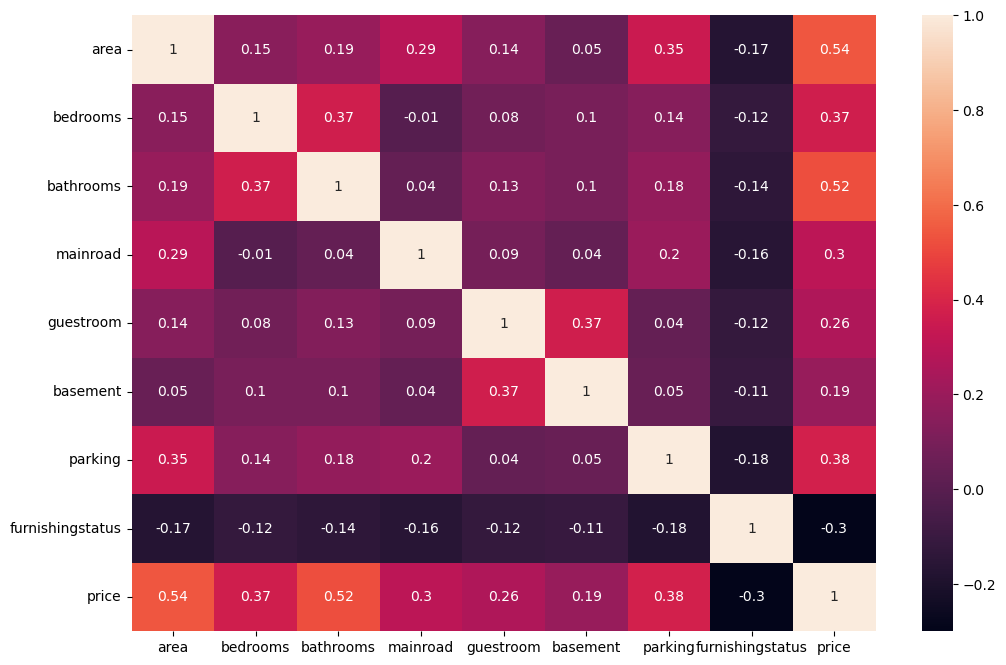

In [46]:
#Xác định mức độ ảnh hưởng của các thuộc tính tới giá bán một căn nhà:
#Xác định hệ số tương quan trong tập dữ liệu
import seaborn as sns
correlation_matrix = df_house.corr().round(2) # hàm tự động tính tương quan giữa các tham số
# annot = True to print the values inside the square
plt.figure(figsize=(12,8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

###  a. Sử dụng 2 thuộc tính diện tích, số phòng tắm để dự đoán giá nhà:
---
### a.1) Lấy dữ liệu

In [47]:
#Sử dụng 2 thuộc tính area, bathrooms để dự đoán giá nhà:
df_house[['area','bathrooms','price']].head(10)

,area,bathrooms,price
0,7420,2,13300000
1,8960,4,12250000
2,9960,2,12250000
3,7500,2,12215000
4,7420,1,11410000
5,7500,3,10850000
6,8580,3,10150000
7,16200,3,10150000
8,8100,1,9870000
9,5750,2,9800000


### a.2) Tách biến độc lập, biến phụ thuộc
---

In [48]:
#Tách Biến độc lập X(area, bathrooms) - Biến phụ thuộc Y (price):
X_2 = df_house[['area','bathrooms']].values
y_price = df_house[['price']].values

X_2[:10,:]

array([[ 7420,     2],
       [ 8960,     4],
       [ 9960,     2],
       [ 7500,     2],
       [ 7420,     1],
       [ 7500,     3],
       [ 8580,     3],
       [16200,     3],
       [ 8100,     1],
       [ 5750,     2]], dtype=int64)

### a.3 Phân tách tập Train-Test
---

In [49]:
#Tách dữ liệu Train - Test:
# Biến X_2: Lưu trữ 2 biến độc lập (area, bathrooms)
# Biến y_prices: Lưu trữ biến phụ thuộc (price)

from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, 
                                                    y_price, 
                                                    test_size=0.2, 
                                                    random_state=50)
print("1. Kích thước tập Training: %d" %len(X_train_2))
print("2. Kích thước tập Test    : %d" %len(X_test_2))

1. Kích thước tập Training: 436
2. Kích thước tập Test    : 109


In [50]:
#Sử dụng model hồi quy tuyến tính cho bài toán 
from sklearn.linear_model import LinearRegression

#Khai báo model với các tham số mặc định:
model_linear2 = LinearRegression()

#Huấn luyện model:
model_linear2.fit(X_train_2, y_train_2)

LinearRegression()

In [51]:
#Xác định các hệ số và phương trình MẶT PHẲNG:
w = np.round(model_linear2.coef_,3)
print('w = ', w)

w0 = np.round(model_linear2.intercept_,3)
print('w0 = ', w0)

print('Phương trình mặt phẳng: Y^ = ', w0 , ' + ' , w[0,0] , ' * x_area + ',w[0,1], '* x_bathrooms' )

w =  [[3.75385000e+02 1.56051013e+06]]
w0 =  [818286.816]
Phương trình mặt phẳng: Y^ =  [818286.816]  +  375.385  * x_area +  1560510.126 * x_bathrooms


### a.5) Dự đoán trên tập TEST
----

In [52]:
#### Dự đoán trên tập TEST
y_pred_2 = model_linear2.predict(X_test_2)

#Làm tròn giá và chuyển về số nguyên:
y_pred_2 = np.round(y_pred_2,0).astype(int)

#Hiển thị dữ liệu 10 căn nhà đầu tiên trong tập test:
print('Giá nhà dự đoán: y^ = ', y_pred_2[:5].ravel())
print('Giá nhà thật   : y  = ', y_test_2[:5].ravel())


Giá nhà dự đoán: y^ =  [3504953 7317776 3745200 4931418 3662615]
Giá nhà thật   : y  =  [3920000 7980000 3500000 2730000 1960000]


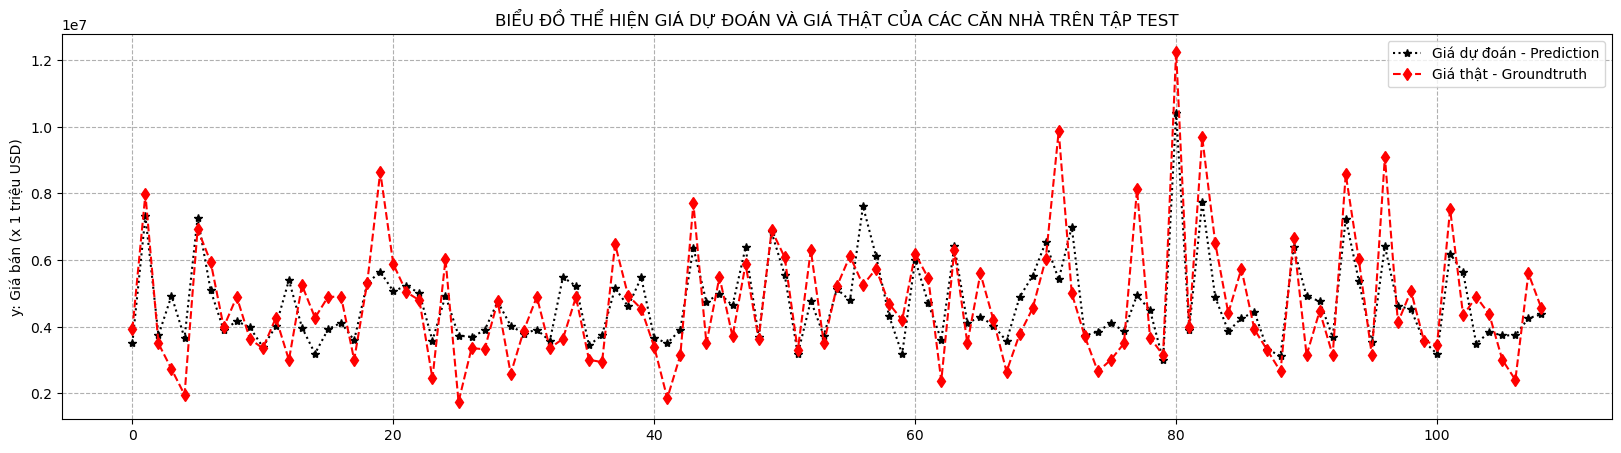

In [53]:
#Trực quan hóa kết quả 50 căn nhà đầu tiên:
plt.figure(figsize=(20,5))
plt.plot(y_pred_2[:], marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test_2[:], marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.title('BIỂU ĐỒ THỂ HIỆN GIÁ DỰ ĐOÁN VÀ GIÁ THẬT CỦA CÁC CĂN NHÀ TRÊN TẬP TEST')
plt.ylabel("y: Giá bán (x 1 triệu USD)")
plt.legend()
plt.grid(ls='--')
plt.show()


In [54]:
#Đánh giá sai số MAE, MSE, RMSE, trên tập test:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Tính các sai số:
mae_2 = mean_absolute_error(y_test_2, y_pred_2)
mse_2 = mean_squared_error(y_test_2, y_pred_2)
rmse_2 = (np.sqrt(mse_2))

#Hiển thị kết quả sai số:
print('MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI 2 THUỘC TÍNH AREA và BATHROOMS:')
print("Độ chính xác của mô hình trên tập TEST:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',round(mae_2,0))
print('2.Sai số MSE = ',round(mse_2,0))
print('3.Sai số RMSE = ',round(rmse_2,0))

MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI 2 THUỘC TÍNH AREA và BATHROOMS:
Độ chính xác của mô hình trên tập TEST:
--------------------------------------------
1.Sai số MAE  =  874608.0
2.Sai số MSE =  1354595642165.0
3.Sai số RMSE =  1163871.0


### a.6) Sử dụng mô hình để dự đoán với căn nhà mới:
---

In [56]:
#Giả sử căn nhà mới có:
# Diện tích: x_area = 14000 (m2)
# Số phòng tắm: 3
#--> Giá căn nhà là bao nhiêu?

x_area = 14000
x_bathrooms = 3
print('Thông số căn nhà: x_area = ', x_area, ', x_bathrooms = ', x_bathrooms)

Thông số căn nhà: x_area =  14000 , x_bathrooms =  3


In [57]:
#Sử dụng mô hình hồi quy để xác định giá bán:
y_price = model_linear2.predict(np.array([[x_area,x_bathrooms]]))

print('--> Giá bán căn nhà tương ứng là: ', np.round(y_price,0))

--> Giá bán căn nhà tương ứng là:  [[10755213.]]


### b. Sử dụng tất cả các thuộc tính để dự đoán giá nhà:
---
Sử dụng tất cả 8 biến độc lập: 'area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom', 'basement', 'parking', 'furnishingstatus' để dự đoán giá bán

In [58]:
#Tập dữ liệu:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   area              545 non-null    int64
 1   bedrooms          545 non-null    int64
 2   bathrooms         545 non-null    int64
 3   mainroad          545 non-null    int64
 4   guestroom         545 non-null    int64
 5   basement          545 non-null    int64
 6   parking           545 non-null    int64
 7   furnishingstatus  545 non-null    int64
 8   price             545 non-null    int64
dtypes: int64(9)
memory usage: 38.4 KB


In [59]:
#hiển thị 5 bản ghi đầu tiên
df_house.head(10)

,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,furnishingstatus,price
0,7420,4,2,1,0,0,2,0,13300000
1,8960,4,4,1,0,0,3,0,12250000
2,9960,3,2,1,0,1,2,1,12250000
3,7500,4,2,1,0,1,3,0,12215000
4,7420,4,1,1,1,1,2,0,11410000
5,7500,3,3,1,0,1,2,1,10850000
6,8580,4,3,1,0,0,2,1,10150000
7,16200,5,3,1,0,0,0,2,10150000
8,8100,4,1,1,1,1,2,0,9870000
9,5750,3,2,1,1,0,1,2,9800000


### b.1) Tách biến độc lập, biến phụ thuộc
---

In [60]:
#Đọc dữ liệu vào các độc lập và phụ thuộc
X_all = df_house.iloc[:,:8].values
y_all = df_house.iloc[:, -1].values

In [61]:
#Hiển thị thuộc tính độc lập của 2 căn nhà đầu tiên
X_all[:2,:]

array([[7420,    4,    2,    1,    0,    0,    2,    0],
       [8960,    4,    4,    1,    0,    0,    3,    0]], dtype=int64)

### b.2) Phân tách tập dữ liệu theo tỷ lệ 80%:20% cho việc Train và Test
---

In [62]:
# Biến X_all: Lưu trữ 8 biến độc lập (input)
# Biến y_all: Lưu trữ biến phụ thuộc (target)

from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, 
                                                    y_all, 
                                                    test_size=0.2, 
                                                    random_state=50)
print("1. Kích thước tập Training: %d" %len(y_train_all))
print("2. Kích thước tập Test    : %d" %len(y_test_all))

1. Kích thước tập Training: 436
2. Kích thước tập Test    : 109


In [63]:
X_train_all[:5,:]

array([[1905,    5,    1,    0,    0,    1,    0,    1],
       [8250,    3,    1,    1,    0,    0,    2,    0],
       [4400,    4,    1,    1,    0,    0,    2,    1],
       [5500,    4,    2,    1,    0,    1,    1,    1],
       [3000,    4,    1,    1,    0,    0,    0,    2]], dtype=int64)

In [64]:
y_train_all[:5]

array([4340000, 3773000, 5565000, 8400000, 2100000], dtype=int64)

### b.3) Khai báo mô hình và huấn luyện
---

In [66]:
#Sử dụng model hồi quy tuyến tính cho bài toán 
from sklearn.linear_model import LinearRegression
#Khai báo model với các tham số mặc định:
model_all = LinearRegression()

#Huấn luyện model:
model_all.fit(X_train_all, y_train_all)

LinearRegression()

### Xác định các hệ số của phương trình:
---

$$ ŷ_{MEDV} = f(x) = w_0 + w_1.X_{area} + w_2.X_{bedrooms} + w_3.X_{bathrooms} + w_4.X_{mainroad}+ w_5.X_{guestroom} + w_6.X_{basement} + w_7.X_{parking} + w_8.X_{furnishingstatus} $$  

In [68]:
#Liệt kê danh sách các hệ số xác định được của phương trình:
w0 = np.round(model_all.intercept_,3)
print('w0 =',w0)
dem=1
for i in model_all.coef_:
    x = 'w'+str(dem)
    print(x,'=',np.round(i,3))
    dem=dem+1

w0 = -85246.996
w1 = 258.349
w2 = 422944.324
w3 = 1182870.919
w4 = 820199.779
w5 = 433374.993
w6 = 161753.541
w7 = 340674.754
w8 = -303174.544


In [69]:
#Các hệ số ứng với từng biến độc lập:
coeff_df = pd.DataFrame(np.round(model_all.coef_,3), 
                        list(df_house.columns[:8]), 
                        columns =['Coefficient'])
coeff_df

,Coefficient
area,258.349
bedrooms,422944.324
bathrooms,1182870.919
mainroad,820199.779
guestroom,433374.993
basement,161753.541
parking,340674.754
furnishingstatus,-303174.544


In [70]:
w0 = np.round(model_all.intercept_,3)
print('w0 =',w0)

w0 = -85246.996


**Phương trình siêu phẳng:**

$$ ŷ_{price} = f(x) =(-85246.996)  + (258.349).X_{area} + (422944.324).X_{bedrooms} + (1182870.919).X_{bathrooms} + 0.849.X_{CHAS}+ (-21.142).X_{NOX} + (4.189).X_{RM} + 0.006.X_{AGE} + (-1.453).X_{DIS} + (0.298).X_{RAD} + (820199.779).X_{mainroad} + (433374.993).X_{guestroom} + (161753.541).X_{basement} + (340674.754).X_{parking} + (-303174.544).X_{furnishingstatus} $$

In [71]:
#Sử dụng model huấn luyện được trên tập Train để dự đoán trên tập Test
y_pred_all = model_all.predict(X_test_all)

#Làm tròn giá bán, và chuyển về kiểu int
y_pred_all = np.round(y_pred_all,0).astype(int)


print(y_pred_all)

[ 3658528  7798960  3741602  3914135  3489549  7166093  5346731  3798804
  4710934  4247620  3063999  4736002  4237071  4871920  2917145  4027363
  5360249  4401882  5438531  6483401  5273188  6254401  4550502  3571361
  5796962  3092586  4588822  3541767  5322107  3294098  4032225  3716349
  4429656  5814683  6215953  3192957  3128609  5771150  4420141  5297767
  4314714  2450301  4199825  6118628  3494553  5635844  4438742  5442445
  4171045  6433813  6749260  3902568  5472717  5119871  5569252  4400660
  8135840  5261601  4219145  3475140  6261321  5647322  3000614  5468280
  4494831  4502315  2817156  2980204  5548684  6195406  6140913  6978704
  6767024  3851038  3173707  3952117  3914294  6735454  3097425  2348137
 10495043  3404036  8498739  4465247  3088410  4175226  5322473  1983035
  2977235  6048795  4204392  4909239  2706312  7324346  6226750  3290910
  6827028  4591453  3635118  4162209  3740815  6260295  5872772  3650778
  3587868  5266257  2276261  4478400  4853026]


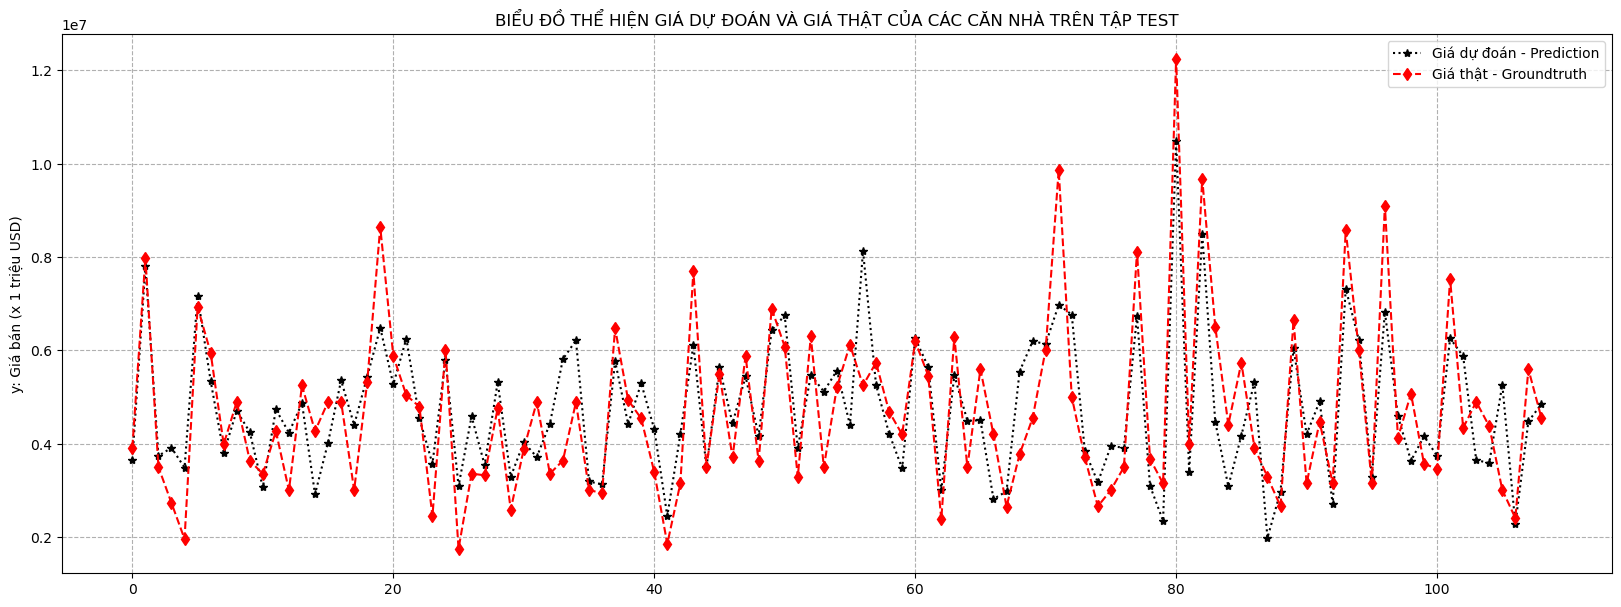

In [72]:
#Trực quan hóa kết quả dự đoán với kết quả groudtruth
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
plt.plot(y_pred_all[:], marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test_all[:], marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.title('BIỂU ĐỒ THỂ HIỆN GIÁ DỰ ĐOÁN VÀ GIÁ THẬT CỦA CÁC CĂN NHÀ TRÊN TẬP TEST')
plt.ylabel("y: Giá bán (x 1 triệu USD)")
plt.legend()
plt.grid(ls='--')
plt.show()


In [73]:
#Đánh giá sai số MAE, MSE, RMSE trên tập test:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Tính các sai số:
mae_all = mean_absolute_error(y_test_all, y_pred_all)
mse_all = mean_squared_error(y_test_all, y_pred_all)
rmse_all = (np.sqrt(mse_all))

#Hiển thị kết quả sai số:
print('MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI TẤT CẢ CÁC THUỘC TÍNH:')
print("Độ chính xác của mô hình trên tập TEST:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',round(mae_all,0))
print('2.Sai số MSE  = ',round(mse_all,0))
print('3.Sai số RMSE = ',round(rmse_all,0))

MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG THAM SỐ MẶC ĐỊNH VỚI TẤT CẢ CÁC THUỘC TÍNH:
Độ chính xác của mô hình trên tập TEST:
--------------------------------------------
1.Sai số MAE  =  864732.0
2.Sai số MSE  =  1141119782267.0
3.Sai số RMSE =  1068232.0
